In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('../dataset/dataset.csv')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df['Attrition'] = df['Attrition'].str.strip().str.capitalize()
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
dc = ['Over18', 'EmployeeNumber','EmployeeCount', 'StandardHours']
df = df.drop(columns=dc, errors='ignore')

In [10]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [11]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
            'JobRole', 'MaritalStatus', 'OverTime']
num_cols = [col for col in X.columns if col not in cat_cols]

In [12]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

Accuracy: 0.8231292517006803
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.40      0.21      0.28        47

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294



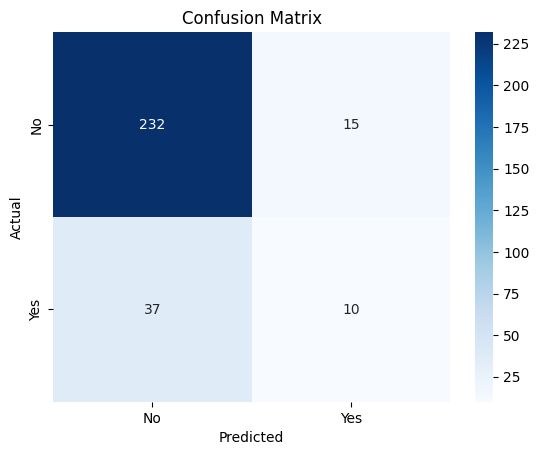

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
import joblib

joblib.dump(rf_model, '../models/random_forest.pkl')

['../models/random_forest.pkl']